In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
framerate = 20
time = 20
dt = 1/framerate

sigma = 0.1
m = 1
h = 1

waveFunction = lambda x, t: sigma / (np.sqrt(sigma**2+(2j*h*t/m))) * np.exp(-x**2/(sigma**2+2j*h*t/m))
x = np.linspace(-20, 20, 100)

<IPython.core.display.Javascript object>


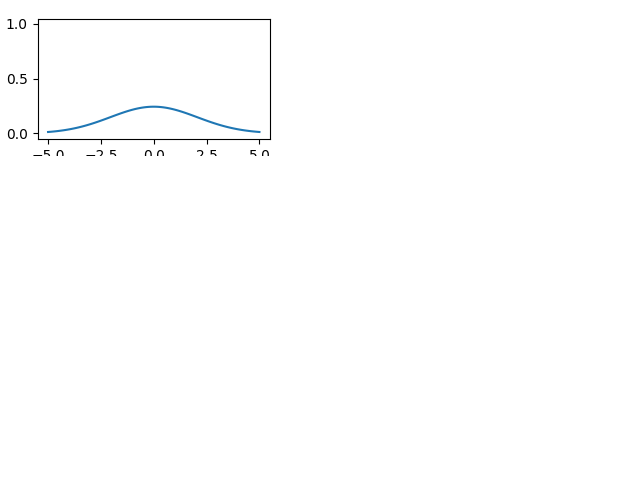

In [13]:
fig, ax = plt.subplots()

line, = ax.plot(x, waveFunction(x, 0))

def animate(i):
    line.set_ydata(waveFunction(x, i * dt / 10))
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=1000/framerate, blit=True, save_count = framerate * time)
ani.save("gauss.mp4")
plt.show()

<IPython.core.display.Javascript object>


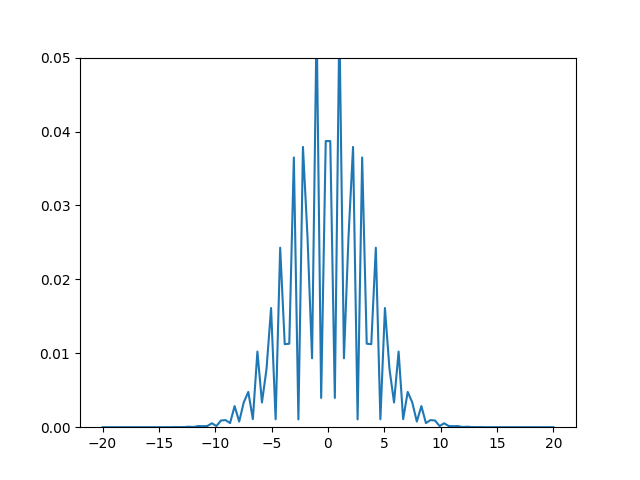

In [56]:
fig, ax = plt.subplots()

ax.set_ylim(0,0.05)
combined = lambda x,t: np.abs(waveFunction(x-1,t) + waveFunction(x+1,t))**2
line, = ax.plot(x, combined(x, 0))

def animate(i):
    line.set_ydata(combined(x, i * dt / 10))
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=1000/framerate, blit=True, save_count = framerate * time)
ani.save("combined.mp4")
plt.show()

<IPython.core.display.Javascript object>


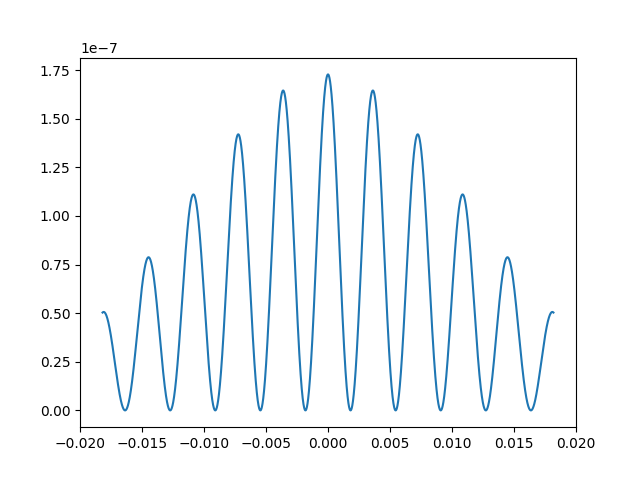

0.0018184737749986568

In [61]:
m = 9.1093837e-31 # electron mass
t = 1e-7 # 1 s flight time
d = 1e-8 # 1nm distance between slits
h = 1.054571817e-34

sigma = d/10
zeropoint = np.pi*(sigma**4+4*h**2*t**2/m**2)/(8*d*h*t/m)

waveFunction = lambda x, t: sigma / np.sqrt(sigma**2+2j*h*t/m) * np.exp(-x**2/(sigma**2+2j*h*t/m))
combined = lambda x,t: np.abs(waveFunction(x-d,t)+waveFunction(x+d,t))**2
x = np.linspace(-10*zeropoint, 10*zeropoint, 10000)
plt.plot(x, combined(x, t))
zeropoint